In [4]:
!pip install gensim


In [5]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [6]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.7236376404762268), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307636260986), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.87980753


Part 1a

In [7]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

The results make sense—words like “cat,” “dogs,” “pet,” and “puppy” are all closely related to “dog” in meaning. They’re either other animals, types of dogs, or general terms for pets. This shows that the word embedding model is good at capturing relationships between words based on how they’re used in real language.

In [8]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827143311500549), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392118573188782), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [9]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661209940910339),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [10]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

I think the embeddings show clear patterns that reveal how language models can reflect biases from their training data. For example, subtracting “man” from “woman” creates a gender vector, and adding it to “doctor” returns words like “nurse,” “woman,” and “pregnant.” This suggests that the model associates female terms with certain professions or roles, which reflects stereotypes present in the data the model was trained on. 

Part 2: Visualization and Embeddings in Space

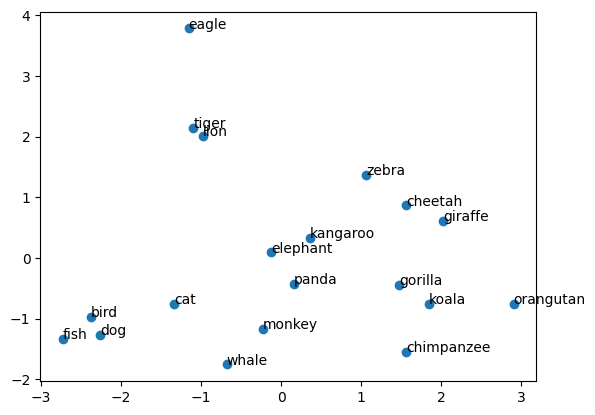

In [11]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

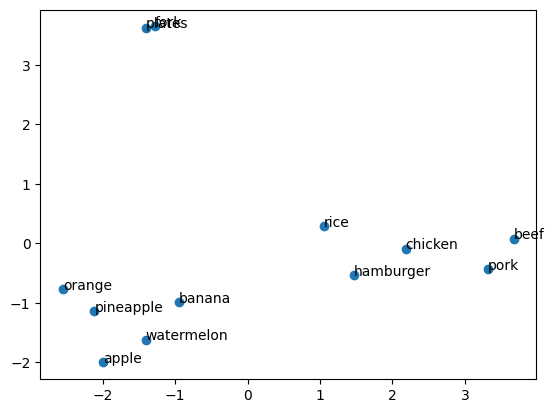

In [12]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

words=["banana","apple","orange", "watermelon", "pineapple", "beef", "pork", "chicken", "hamburger", "rice", "plates", "fork"]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


Yes, the distances between the words make sense. Fruits like "apple," "banana," and "orange" are close together, showing they are related. Meats like "beef," "pork," and "chicken" also form a group. Utensils like "fork" and "spoon" are grouped separately. This shows the model understands word meanings and puts similar things near each other.

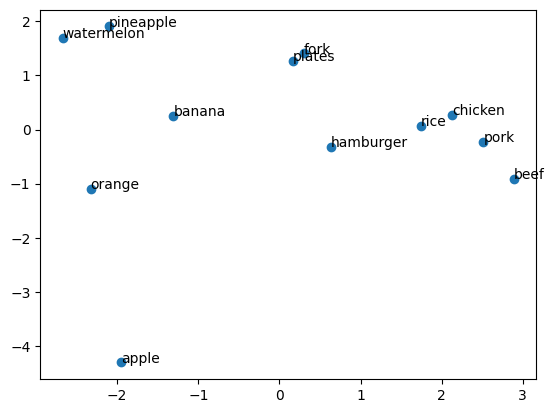

In [13]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")
words=["banana","apple","orange", "watermelon", "pineapple", "beef", "pork", "chicken", "hamburger", "rice", "plates", "fork"]

X=[twitter_model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

The new chart looks different because it's using word vectors trained on Twitter data, which is more casual and messy. The groups like fruits and meats are still somewhat close, but the boundaries are less clear than before. This happens might because words on Twitter are used in more varied and informal ways, so the model doesn’t capture clean categories as well as one trained on more formal text.

Part 3: Embedding reddit posts

In [14]:
#read in uiuc csv
import pandas as pd
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [15]:
#using the code from project 1, clean the text and create a bag of words representation of the text
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

data['cleaned_text'] = data['text'].apply(lambda x: lemmatize(clean(x)))


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_text'])

y = data['label']

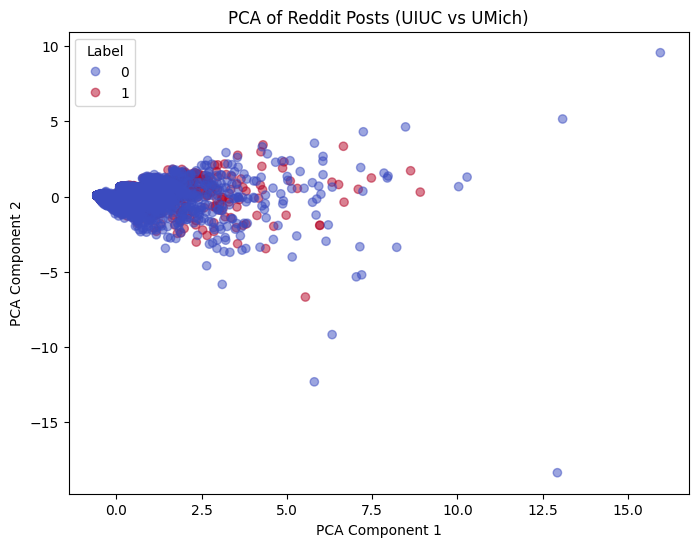

In [16]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())  # X is the bag-of-words matrix

# Plot the PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title('PCA of Reddit Posts (UIUC vs UMich)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(*scatter.legend_elements(), title="Label")
plt.show()

No, there isn't a clear separation. The red (UIUC) and blue (UMich) points are mostly mixed together, especially in the dense center of the plot. This means that the way people write in the two subreddits is quite similar based on the words used. The bag-of-words model didn't capture strong enough differences to easily tell them apart.

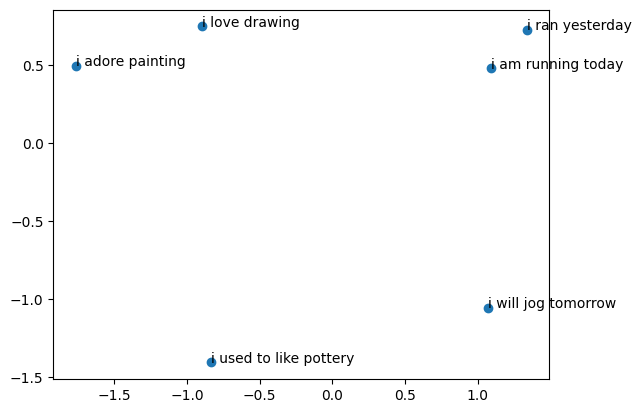

In [17]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [18]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

/Users/daijiayin/miniconda3/envs/is310/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/daijiayin/miniconda3/envs/is310/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


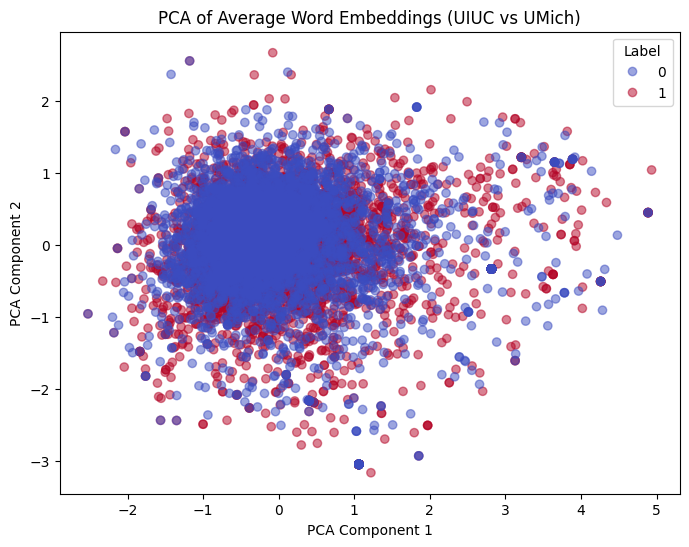

In [19]:
data['avg_embedding'] = data['cleaned_text'].apply(lambda x: avg_embedding(x, model))

data = data[data['avg_embedding'].apply(lambda x: isinstance(x, np.ndarray))]

X_embed = np.stack(data['avg_embedding'].values)
y_embed = data['label'].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_embed)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_embed, cmap='coolwarm', alpha=0.5)
plt.title("PCA of Average Word Embeddings (UIUC vs UMich)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Label")
plt.show()


**How is this plot different from the previous one?**

This plot uses average word embeddings instead of a bag-of-words model. That means it captures the meaning of the sentences, not just word counts. The points are now more densely packed in the center with smoother edges, and there’s less extreme spread compared to the earlier plot.

**Is there clear separation?**

No, the red (UIUC) and blue (UMich) dots are still very mixed. There's no obvious boundary between the two groups, which suggests that the language used in the two subreddits is still very similar — even when we look at word meaning.

Part 4: HuggingFace and BERT

In [20]:
!pip install transformers

In [21]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use mps:0


In [22]:
!pip3 install torch torchvision

In [23]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [26]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
sentiments = data['text'].apply(lambda x: pipe(x)[0]['label'])

data['sentiment'] = sentiments

most_common_sentiment = data['sentiment'].value_counts().idxmax()
print("Most common sentiment label:", most_common_sentiment)


Most common sentiment label: NEU


In [25]:
from transformers import AutoTokenizer

# Load tokenizer for truncating text properly
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

def truncate_text(text, max_tokens=128):
    tokens = tokenizer.tokenize(text)
    truncated = tokenizer.convert_tokens_to_string(tokens[:max_tokens])
    return truncated

# Apply truncation and sentiment classification
sentiments = data['text'].apply(lambda x: pipe(truncate_text(x))[0]['label'])
data['sentiment'] = sentiments

# Report the most common sentiment
most_common_sentiment = data['sentiment'].value_counts().idxmax()
print("Most common sentiment label:", most_common_sentiment)


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


Most common sentiment label: NEU


In [27]:
#look at ten sample posts and labels; do you agree with all of them? 
sample_posts = data[['text', 'sentiment', 'label']].sample(10)
for i, row in sample_posts.iterrows():
    print(f"\nPost:\n{row['text']}\nSentiment: {row['sentiment']}, Subreddit: {'UIUC' if row['label'] == 1 else 'UMich'}")



Post:
I’m an alumni and I want to come to the career fair. I have lost my student ID card. Am I still able to come in?
Sentiment: NEU, Subreddit: UMich

Post:
*I've had good luck*

*Getting foam tape to stick on*

*Brick, maybe try that?*

\- SweetWitch4U

---

^(I detect haikus. And sometimes, successfully.) ^[Learn&#32;more&#32;about&#32;me.](https://www.reddit.com/r/haikusbot/)

^(Opt out of replies: "haikusbot opt out" | Delete my comment: "haikusbot delete")
Sentiment: POS, Subreddit: UIUC

Post:
I heard the Main Library has one.
Sentiment: NEU, Subreddit: UIUC

Post:
also in need of iolab for FA 24
Sentiment: NEU, Subreddit: UIUC

Post:
I had an older friend from West Virginia once who was driving along a bit north of here and exclaimed “Finally i see some small mountains on the horizon!” But it was just some near by tailings hills from underground coal mines. ;-) much disappointment
Sentiment: NEG, Subreddit: UIUC

Post:
They’re doing similar stuff to me! Let me know if you nee

well, I think I at least agree with most of them.

In [28]:
#is the UIUC or Michigan subreddit more negative?
neg_counts = data[data['sentiment'] == 'NEG']['label'].value_counts()
uiuc_neg = neg_counts.get(1, 0)
mich_neg = neg_counts.get(0, 0)

uiuc_total = (data['label'] == 1).sum()
mich_total = (data['label'] == 0).sum()

print("UIUC negative rate:", uiuc_neg / uiuc_total)
print("UMich negative rate:", mich_neg / mich_total)


UIUC negative rate: 0.24896265560165975
UMich negative rate: 0.25626620570440795


UMich.